In [74]:
import numpy as np  # linear algebra  
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting
import seaborn as sns

In [75]:
# sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
df = pd.read_csv("C:/Users/Admin/Downloads/houseprice_data.csv") # read data (make sure .csv in folder)

In [4]:
print(df.head()) # print first 5 rows of data

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

In [5]:
df.shape

(21613, 19)

In [6]:
df.describe # print mean, standard deviation, max, min, etc.

<bound method NDFrame.describe of           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7

In [7]:
print(df.info()) # prints info about a DataFrame, dtype, non-null values, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [8]:
print(df.corr(),'\n') # print correlation coefficient for data


                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308338   0.525134     0.702044  0.089655  0.256786   
bedrooms       0.308338  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525134  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702044  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089655  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256786  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266331 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397346  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036392  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667463  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605566  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323837  0.3

In [37]:
X = df.iloc[:, [3]].values  # inputs Sqft_living
y = df.iloc[:, 0].values    # outputs price


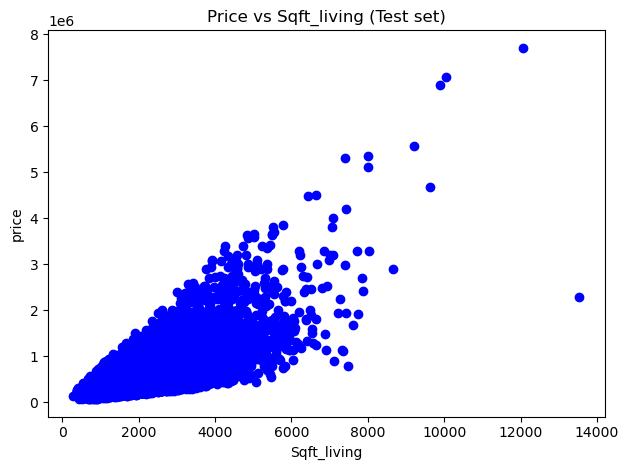

In [42]:
# visualise initial data set
fig1, ax1 = plt.subplots()

ax1.scatter(X, y, color = 'blue')
ax1.set_title('Price vs Sqft_living (Test set)')
ax1.set_xlabel('Sqft_living')
ax1.set_ylabel('price')
fig1.tight_layout()
fig1.savefig('houseprice_initial_plot.png')


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, 
	random_state = 0)

In [111]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [112]:
# The coefficients
print('Coefficients: ', regr.coef_)
# The intercept
print('Intercept: ', regr.intercept_)
# The mean squared error
print('Mean squared error: %.8f'
	% mean_squared_error(y_test, regr.predict(X_test)))
# The R^2 value:
print('Coefficient of determination: %.2f'
	% r2_score(y_test, regr.predict(X_test)))

Coefficients:  [273.97842513]
Intercept:  -29315.417822497897
Mean squared error: 72251932678.75190735
Coefficient of determination: 0.50


In [113]:
print('Predict single value: ', regr.predict(np.array([[770]])))

Predict single value:  [181647.96953105]


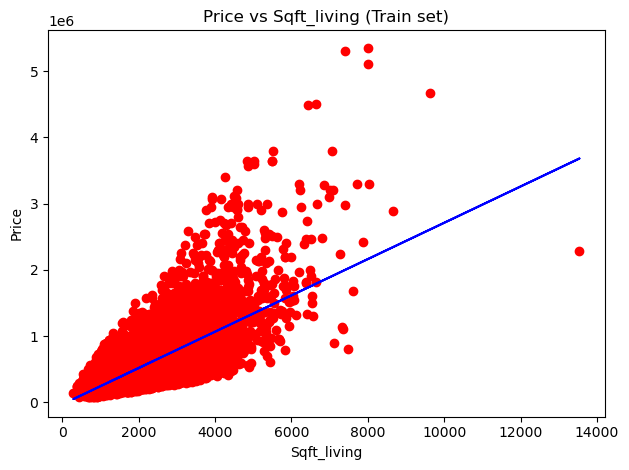

In [49]:
fig2, ax2 = plt.subplots()

ax2.scatter(X_train, y_train, color = 'red')
ax2.plot(X_train, regr.predict(X_train), color = 'blue')
ax2.set_title('Price vs Sqft_living (Train set)')
ax2.set_xlabel('Sqft_living')
ax2.set_ylabel('Price')
fig2.tight_layout()
fig2.savefig('houseprice_train_plot.png')

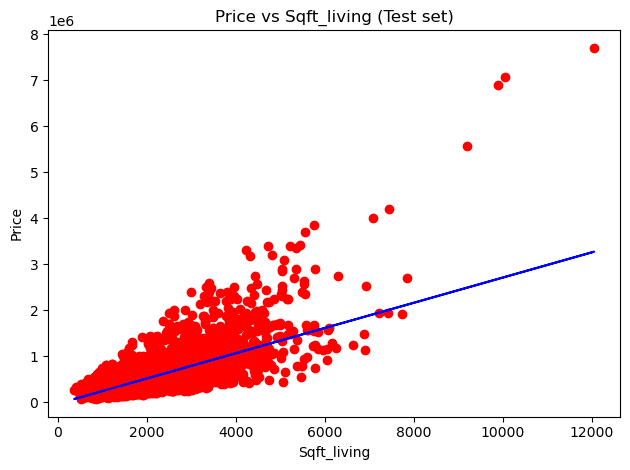

In [50]:
fig3, ax3 = plt.subplots()

ax3.scatter(X_test, y_test, color = 'red')
ax3.plot(X_test, regr.predict(X_test), color = 'blue')
ax3.set_title('Price vs Sqft_living (Test set)')
ax3.set_xlabel('Sqft_living')
ax3.set_ylabel('Price')

fig3.tight_layout()
fig3.savefig('Houseprice_test_plot.png')


Using Multiple Features

In [114]:
X = df.iloc[:,[2,3,9,10]]
y = df.iloc[:,0]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, 
	random_state = 0)

In [116]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [117]:
# The coefficients
print('Coefficients: ', regr.coef_)
# The intercept
print('Intercept: ', regr.intercept_)
# The mean squared error
print('Mean squared error: %.8f'
	% mean_squared_error(y_test, regr.predict(X_test)))
# The R^2 value:
print('Coefficient of determination: %.2f'
	% r2_score(y_test, regr.predict(X_test)))

Coefficients:  [-3.88840006e+04  2.47089868e+02  1.15466280e+05 -7.69727883e+01]
Intercept:  -637348.6955069232
Mean squared error: 65514401253.55470276
Coefficient of determination: 0.55


In [119]:
print('Predict single value: ', regr.predict(np.array([[1,770,6,770]])))

Predict single value:  [147555.13589129]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


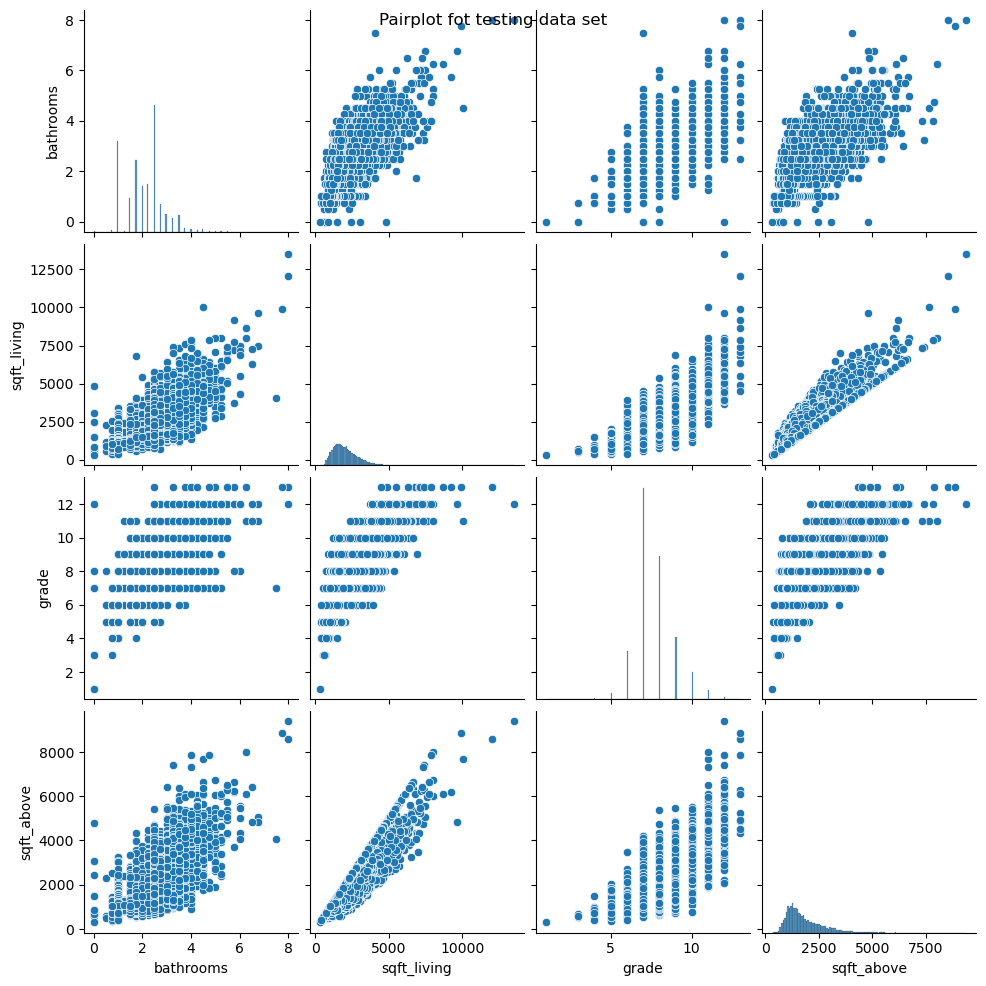

In [79]:
pairplot_test = sns.pairplot(df, vars =['bathrooms','sqft_living','grade', 'sqft_above'])
pairplot_test.fig.suptitle("Pairplot fot testing data set")
pairplot_test.savefig('new_plot.png')
plt.show()

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
data = pd.read_csv("C:/Users/Admin/Downloads/houseprice_data.csv")

In [86]:
columns_to_drop = ['lat','long', 'waterfront','view']

In [87]:
data = data.drop(columns=columns_to_drop)

In [88]:
features_to_normalize = ['sqft_basement','yr_renovated']

In [89]:
scaler = MinMaxScaler()

In [90]:
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

In [91]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.000000,1955,0.000000,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,0.082988,1951,0.988089,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.000000,1933,0.000000,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,0.188797,1965,0.000000,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.000000,1987,0.000000,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0.000000,2009,0.000000,98103,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0.000000,2014,0.000000,98146,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0.000000,2009,0.000000,98144,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0.000000,2004,0.000000,98027,1410,1287


In [92]:
X = data.iloc[:,0:15]
y = data.iloc[:,0]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, 
	random_state = 0)

In [94]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [95]:
# The coefficients
print('Coefficients: ', regr.coef_)
# The intercept
print('Intercept: ', regr.intercept_)
# The mean squared error
print('Mean squared error: %.8f'
	% mean_squared_error(y_test, regr.predict(X_test)))
# The R^2 value:
print('Coefficient of determination: %.2f'
	% r2_score(y_test, regr.predict(X_test)))

Coefficients:  [ 1.00000000e+00  3.03134862e-13  5.78759412e-12  8.26853961e-15
  2.20784767e-16 -1.69541272e-11 -1.71529872e-11  4.43097401e-12
 -4.07069212e-15  2.56048906e-18  1.13478558e-13  5.12768472e-12
  1.24563428e-13 -1.23023438e-15 -2.53274458e-18]
Intercept:  -1.3620592653751373e-08
Mean squared error: 0.00000000
Coefficient of determination: 1.00
